# 01.3 Market Basket Analysis by Association Rule
### 賴昱瑋, 2020

- Packages: pandas, numpy, matplotlib, mlxtend
- Reference:
    1. https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/
    2. https://pbpython.com/market-basket-analysis.html
---

### Read the raw dataset as 'groceries'
the dataset contains the item list of each transaction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

groceries = pd.read_table('01.3_groceries.csv', header= None)
groceries.columns = ['Items']

groceries['Items'] = list(groceries['Items'].str.split(','))
groceries.insert(0, "ID", [i for i in range(0, len(groceries))], True) 
groceries.head()

,ID,Items
0,0,"[citrus fruit, semi-finished bread, margarine,..."
1,1,"[tropical fruit, yogurt, coffee]"
2,2,[whole milk]
3,3,"[pip fruit, yogurt, cream cheese , meat spreads]"
4,4,"[other vegetables, whole milk, condensed milk,..."


---
## 3-1 Data preprocessing
- Step1: Create a unique item list for all the buying record
- Step2: Create a buying record (Record the items each customer bought including the item name and quantity)
- Step3: Create the basket binary dataset (Record whether the customer ('ID') buy the specific item or not)

### Step1: Create a unique item list ('item_list')

In [2]:
item_list = list([i for sublist in groceries['Items'] for i in sublist])
item_list = list(set(item_list))

### Step2: Create a buying record (Record the items each customer bought including the item name and quantity)
- Each row contains only one buying record (id, item name, quantity)
- Given that the index of the raw dataset 'groceries' is 'ID'
- Given that the quantity is 1 for each buying record of the raw dataset 'groceries'

### ('groceries_df')

In [3]:
groceries_df = pd.DataFrame(columns=['ID', 'Itemname', 'Quantity'])
for i in range(0, len(groceries)):
    for item in groceries.loc[i]['Items']:
        groceries_df = groceries_df.append(
            pd.DataFrame([[groceries.loc[i]['ID'], item, 1]], columns=['ID', 'Itemname', 'Quantity']),ignore_index=True)
groceries_df.head()

,ID,Itemname,Quantity
0,0,citrus fruit,1
1,0,semi-finished bread,1
2,0,margarine,1
3,0,ready soups,1
4,1,tropical fruit,1


### Step3: Create the basket binary dataset
- Record what item did a customer buy
- One hot encode the dataset
### ('basket')

In [4]:
basket = (groceries_df.groupby(['ID', 'Itemname'])['Quantity']
        .sum().unstack().reset_index().fillna(0)
        .set_index('ID'))
basket.head()

Itemname,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---
## 3-2 top 5 association rules
### The minimum requirement of the problem:
- minimum support to 0.001: All meets the requirement
- minimum coffidence to 0.15

### Set requirement
1. support: 0.025 (exclude the items that is too rare)
2. confidence: 0.4 (limit the rules to higher confidence)
3. lift should > 1 (check lift of the rules is larger than 1)

In [5]:
freq_items = apriori(basket, min_support = 0.025, use_colnames=True) ### Set minimum support to 0.025
freq_items.sort_values(by = 'support', ascending = False).head() 

,support,itemsets
52,0.255516,(whole milk)
35,0.193493,(other vegetables)
39,0.183935,(rolls/buns)
44,0.174377,(soda)
53,0.139502,(yogurt)


#### Form the rules set (lift for all rules should be larger than 1)

In [6]:
rules = association_rules(freq_items, metric = "lift", min_threshold = 1)

#### Get the top rules with higher confidence (confidence >= 0.4) and sort by confidence

In [7]:
top_rules = rules[rules['confidence'] >= 0.4].sort_values(by = 'support', ascending = False).head() ### Set coffidence to 0.4

### The Top 5 Association Rules

In [8]:
top_rules.reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(yogurt),(whole milk),0.139502,0.255516,0.056024,0.401603,1.571735,0.020379,1.244132
1,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401
2,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
3,(tropical fruit),(whole milk),0.104931,0.255516,0.042298,0.403101,1.577595,0.015486,1.247252
4,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735


---
## 3-3 Possible stories of the top 5 association rules

#### Rule 1: butter --> whole milk
#### Rule 2: curd --> whole milk
#### Rule 3: domestic eggs --> whole milk
#### Rule 4: whipped/sour cream --> whole milk
#### Rule 5: root vegetables --> whole milk

- whole milk is the best seller in the store
- Those who buy dairy products (milk-related) might also buy whole milk
(butter, curd, whipped/sour cream are dairy products)
- The rules 1 to 5 might relate to the items placed in the store. All of them need to be fridged and these products might be placed nearby.
- Butter, eggs, and whipped/sour cream with milk might be related to baking (bread, cookies, cake, etc.)
- Those who buy vegetables might shop for the daily necessity of food. Therefore, it is very possible for them to buy both root vegetables and whole milk.


---
## 3-4 Visualization of the association rules

### 1. Support & Confidence

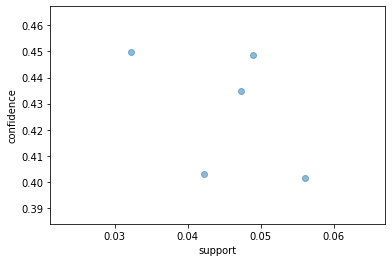

In [9]:
plt.scatter(top_rules['support'], top_rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

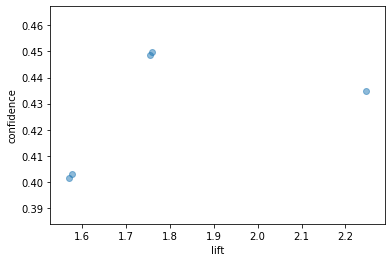

In [10]:
plt.scatter(top_rules['lift'], top_rules['confidence'], alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence')
plt.show()

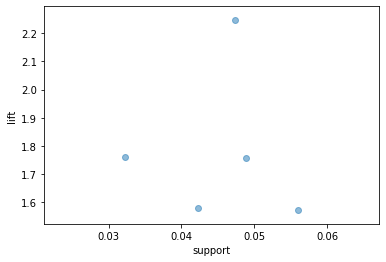

In [11]:
plt.scatter(top_rules['support'], top_rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.show()